# Angular Focusing, Squeezing, and Rainbow Formation in a Strongly Driven Quantum Rotor
I. Sh. Averbukh and R. Arvieu

https://doi.org/10.1103/PhysRevLett.87.163601

## Abstract
Semiclassical catastrophes in the dynamics of a quantum rotor (molecule) driven by a strong time-varying field are considered. We show that for strong enough fields, a sharp peak in the rotor angular distribution can be achieved via a time-domain focusing phenomenon, followed by the formation of rainbow-like angular structures. A strategy leading to the enhanced angular squeezing is proposed that uses a specially designed sequence of pulses. The predicted effects can be observed in many processes, ranging from molecular alignment (orientation) by laser fields to heavy-ion collisions, and the trapping of cold atoms by a standing light wave.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['text.usetex'] = True

## FIG. 1.
Angular distribution of a quantum rotor excited by a strong $\delta$ kick ($P=85$). The graphs correspond to (a) $\tau=0.5\tau_f$, (b) $\tau=\tau_f$, (c) $\tau=2\tau_f$, (d) $\tau=\tau_f+T_\mathrm{rev}/2$, (e) $t=\tau_f+T\mathrm{rev}/3$, (f) $t=\tau_f+T\mathrm{rev}/4$, (g) $t=1.8\tau_f+T\mathrm{rev}/2$, (h) $t=1.8\tau_f+T\mathrm{rev}/3$, and (i) $t=1.8\tau_f+T\mathrm{rev}/4$, respectively.

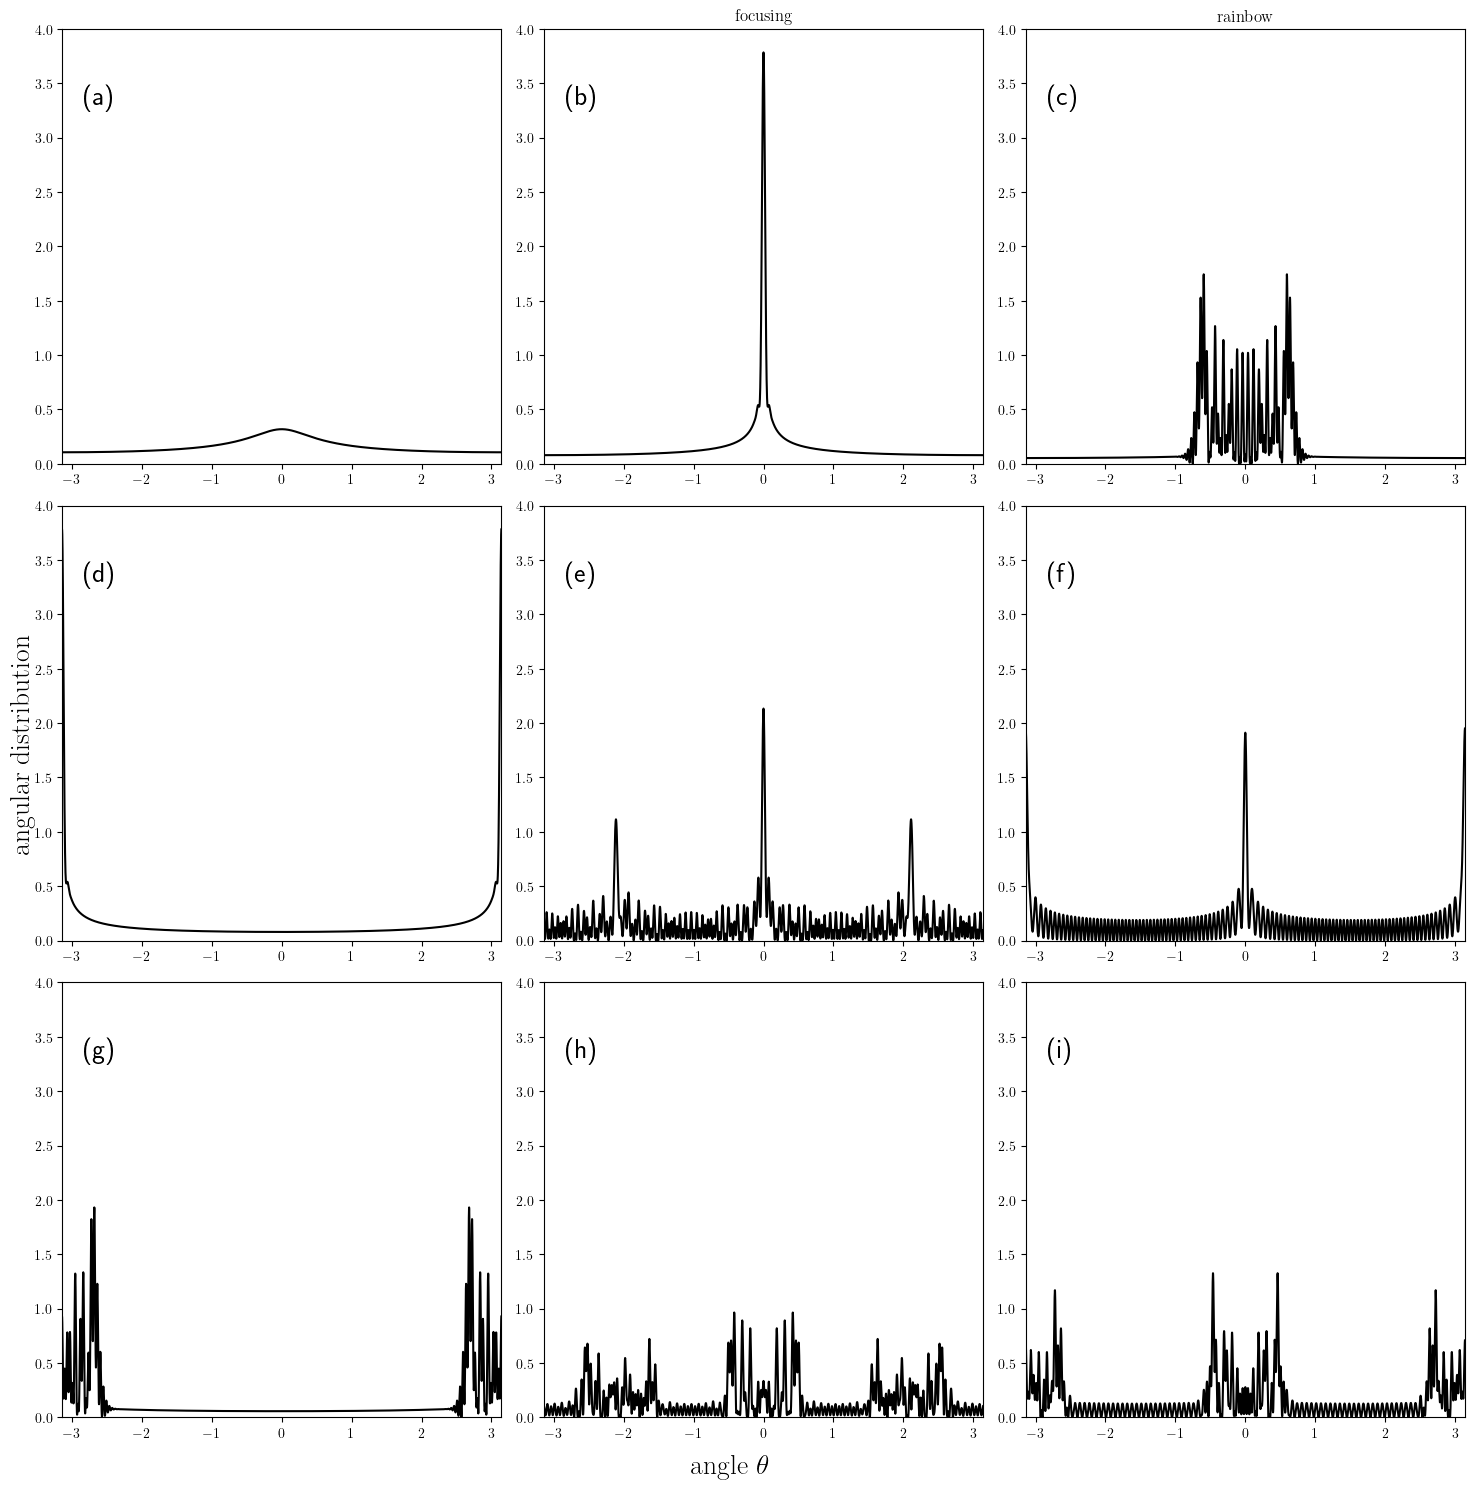

In [2]:
T_rev = 4 * np.pi
P = 85
tau_f = 1 / P
tau = [
    tau_f / 2,
    tau_f,
    tau_f * 2,
    tau_f + T_rev / 2,
    tau_f + T_rev / 3,
    tau_f + T_rev / 4,
    1.8 * tau_f + T_rev / 2,
    1.8 * tau_f + T_rev / 3,
    1.8 * tau_f + T_rev / 4,
]

# Grid setup
n = 2**12
p = np.arange(-n, n)
x = p / n * np.pi
dx = np.mean(np.diff(x))

# Initial function
Fx = np.exp(+1j * P * np.cos(x))

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Loop through each tau value
for i in range(9):
    # Initialize phi
    phi = np.zeros(2 * n, dtype=complex)
    phi[n] = 1  # Delta function at the center

    # Compute Fp
    Fp = np.exp(-1j * p**2 * tau[i] / 2)

    # Compute psi and phi
    psi = Fx * np.fft.ifft(phi)
    phi = Fp * np.fft.fft(psi)
    psi = np.fft.ifft(phi)

    # Normalize psi
    psi_norm = np.abs(psi) ** 2
    psi_norm /= np.sum(psi_norm * dx)  # Normalize by integral

    # Plot the result
    axs[i // 3, i % 3].plot(x, psi_norm, "k")
    axs[i // 3, i % 3].set_xlim([-np.pi, np.pi])
    axs[i // 3, i % 3].set_ylim([0, 4])
    if i == 1:
        axs[i // 3, i % 3].set_title(r"\textrm{focusing}")
    if i == 2:
        axs[i // 3, i % 3].set_title(r"\textrm{rainbow}")

    # Add label from (a) to (i)
    axs[i // 3, i % 3].text(
        -np.pi * 0.9, 3.5, f"({chr(97 + i)})", fontsize=20, verticalalignment="top"
    )

# Add common labels and title
fig.supxlabel(r"$\textrm{angle }\theta$", fontsize=20)
fig.supylabel(r"$\textrm{angular distribution}$", fontsize=20)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## FIG. 2.
Classical map representing the final angle $\theta$ as a function of initial angle $\theta_0$ for (a) $\tau=0.5\tau_f$, (b) $\tau=\tau_f$, (c) $\tau=3\tau_f$, and (d) $\tau=10\tau_f$.

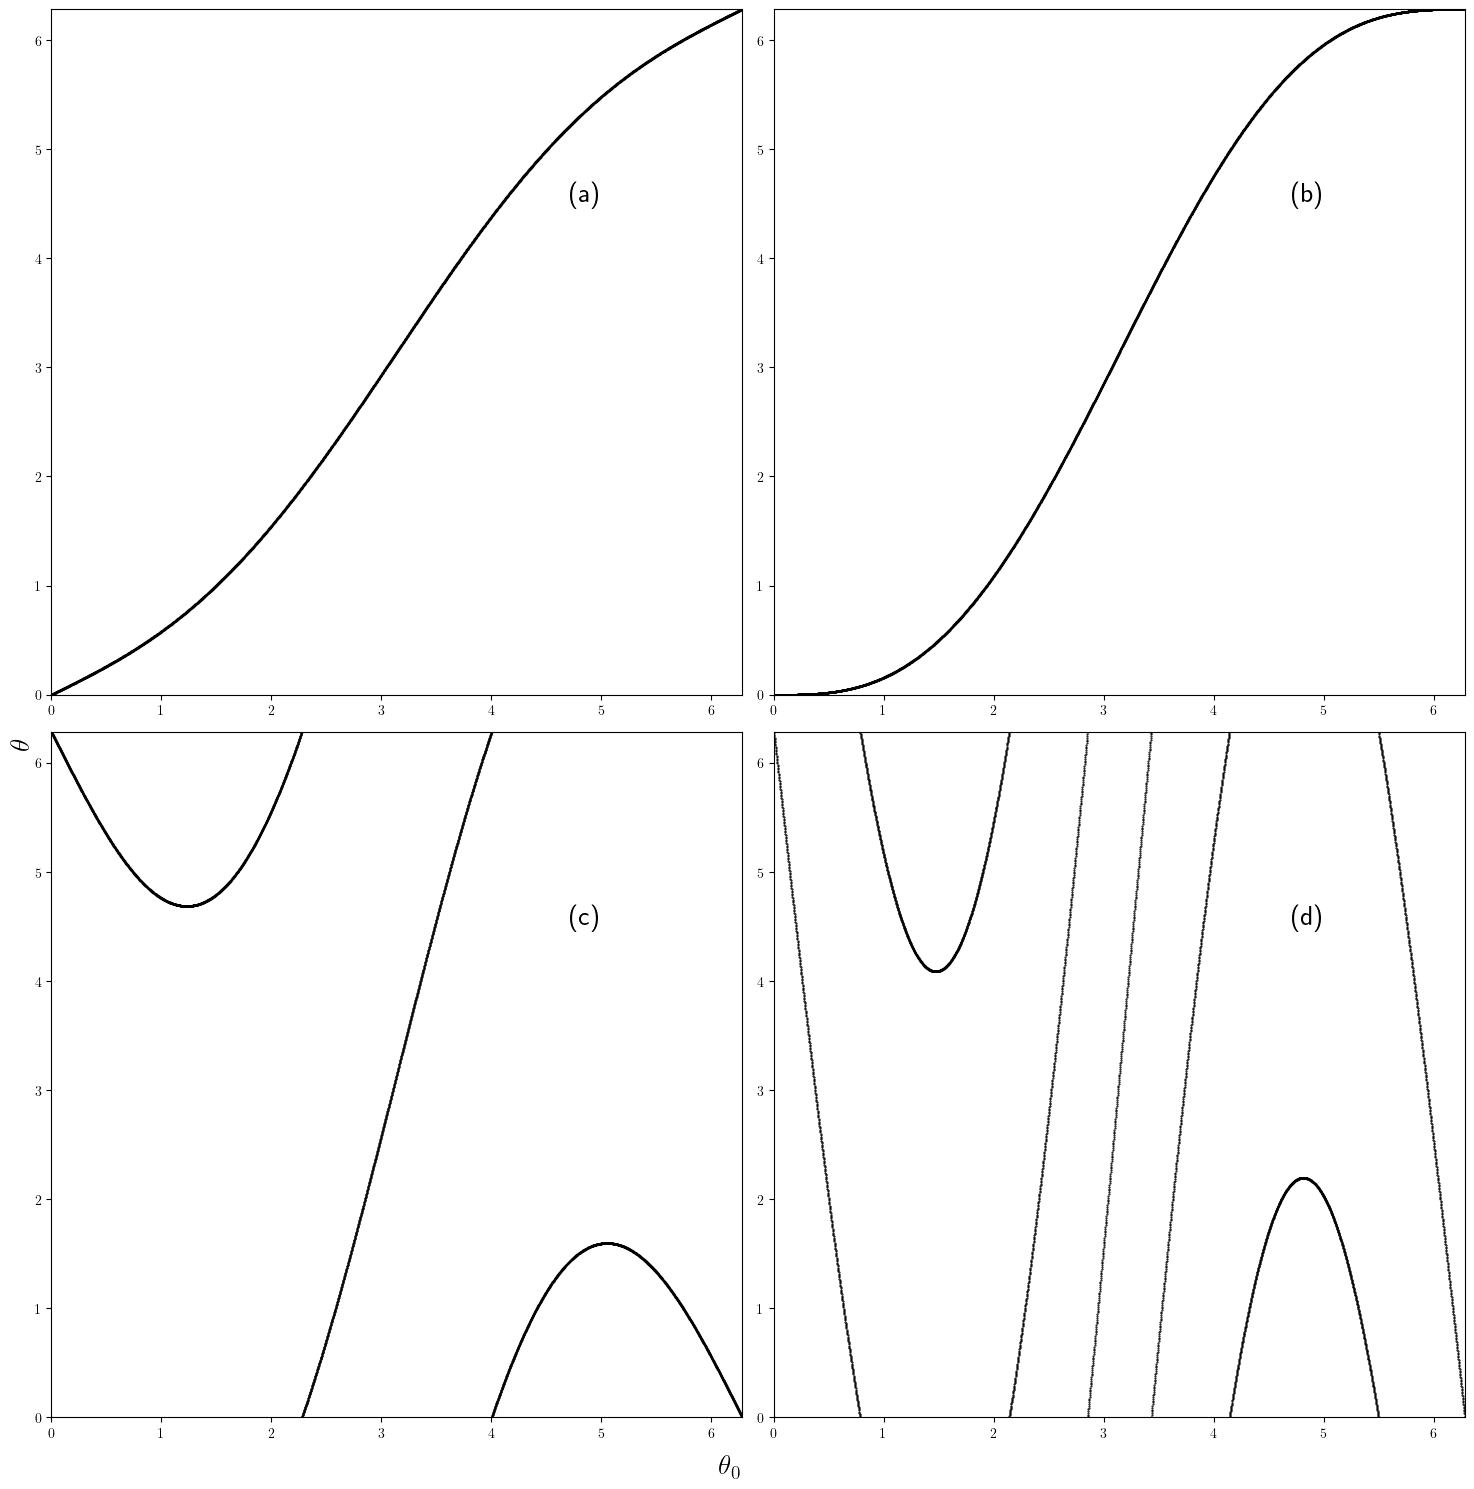

In [3]:
tau = [tau_f / 2, tau_f, tau_f * 3, tau_f * 10]
x_0 = np.linspace(0, 2 * np.pi, n, endpoint=False)

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

for i in range(4):
    x = np.mod(x_0 - P * tau[i] * np.sin(x_0), 2 * np.pi)
    ax[i // 2, i % 2].plot(x_0, x, "k.", markersize=1)
    ax[i // 2, i % 2].set_xlim([0, 2 * np.pi])
    ax[i // 2, i % 2].set_ylim([0, 2 * np.pi])
    ax[i // 2, i % 2].text(
        np.pi * 1.5,
        np.pi * 1.5,
        f"({chr(97 + i)})",
        fontsize=20,
        verticalalignment="top",
    )

# Add common labels and title
fig.supxlabel(r"$\theta_0$", fontsize=20)
fig.supylabel(r"$\theta$", fontsize=20)

# Adjust layout
plt.tight_layout()
plt.show()

## FIG. 3.
Accumulative angular squeezing. Graphs are shown in double logarithmic scale.

In [4]:
P = 3